In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\HARSHITA KOTHARI\Downloads\Retail sales historical data.csv")

In [3]:
df.head()

,Month,sales in millions
0,1964-01,3117.0
1,1964-02,9771.0
2,1964-03,2465.0
3,1964-04,9904.0
4,1964-05,4246.0


In [4]:
df.tail()

,Month,sales in millions
101,1972-06,3186.0
102,1972-07,8481.0
103,1972-08,8303.0
104,1972-09,3469.0
105,sales millions ?64-?72,NaN


In [5]:
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,3117.0
1,1964-02,9771.0
2,1964-03,2465.0
3,1964-04,9904.0
4,1964-05,4246.0


In [6]:
df.tail()

,Month,Sales
101,1972-06,3186.0
102,1972-07,8481.0
103,1972-08,8303.0
104,1972-09,3469.0
105,sales millions ?64-?72,NaN


In [14]:
## Drop last 1 row
df.drop(105,axis=0,inplace=True)

In [15]:
df.tail()

,Month,Sales
100,1972-05,7307.0
101,1972-06,3186.0
102,1972-07,8481.0
103,1972-08,8303.0
104,1972-09,3469.0


In [16]:
df['Month']=pd.to_datetime(df['Month'])

In [17]:
df.head()

,Month,Sales
0,1964-01-01,3117.0
1,1964-02-01,9771.0
2,1964-03-01,2465.0
3,1964-04-01,9904.0
4,1964-05-01,4246.0


In [18]:
df.set_index('Month',inplace=True)

In [19]:
df.head()

,Sales
Month,
1964-01-01,3117.0
1964-02-01,9771.0
1964-03-01,2465.0
1964-04-01,9904.0
1964-05-01,4246.0


In [20]:
df.describe()

,Sales
count,105.000000
mean,6343.942857
std,2591.323410
min,1270.000000
25%,4110.000000
50%,6665.000000
75%,8589.000000
max,9955.000000


<Axes: xlabel='Month'>

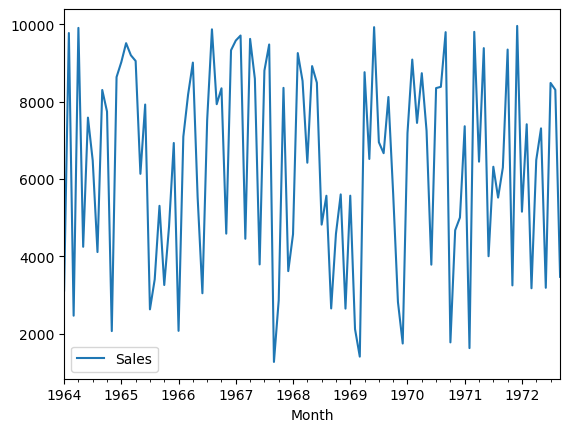

In [21]:
df.plot()

In [22]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [23]:
test_result=adfuller(df['Sales'])

In [24]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [25]:
adfuller_test(df['Sales'])

ADF Test Statistic : -10.482000054841244
p-value : 1.20696807964281e-18
#Lags Used : 0
Number of Observations Used : 104
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [26]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [27]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    3117.0
1964-03-01    9771.0
1964-04-01    2465.0
1964-05-01    9904.0
               ...  
1972-05-01    6489.0
1972-06-01    7307.0
1972-07-01    3186.0
1972-08-01    8481.0
1972-09-01    8303.0
Name: Sales, Length: 105, dtype: float64

In [28]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [30]:
df.head(25)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,3117.0,NaN,NaN
1964-02-01,9771.0,6654.0,NaN
1964-03-01,2465.0,-7306.0,NaN
1964-04-01,9904.0,7439.0,NaN
1964-05-01,4246.0,-5658.0,NaN
1964-06-01,7585.0,3339.0,NaN
1964-07-01,6477.0,-1108.0,NaN
1964-08-01,4110.0,-2367.0,NaN
1964-09-01,8299.0,4189.0,NaN


In [31]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.9700742545756915
p-value : 2.5427327553338862e-05
#Lags Used : 11
Number of Observations Used : 81
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

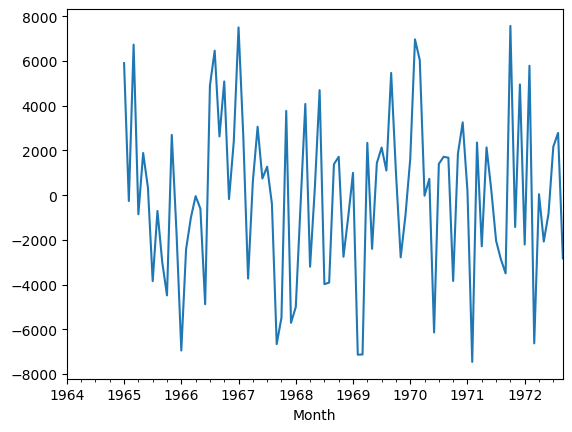

In [32]:
df['Seasonal First Difference'].plot()

In [38]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 

C:\Users\HARSHITA KOTHARI\OneDrive\Desktop\anaconda jupyter\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


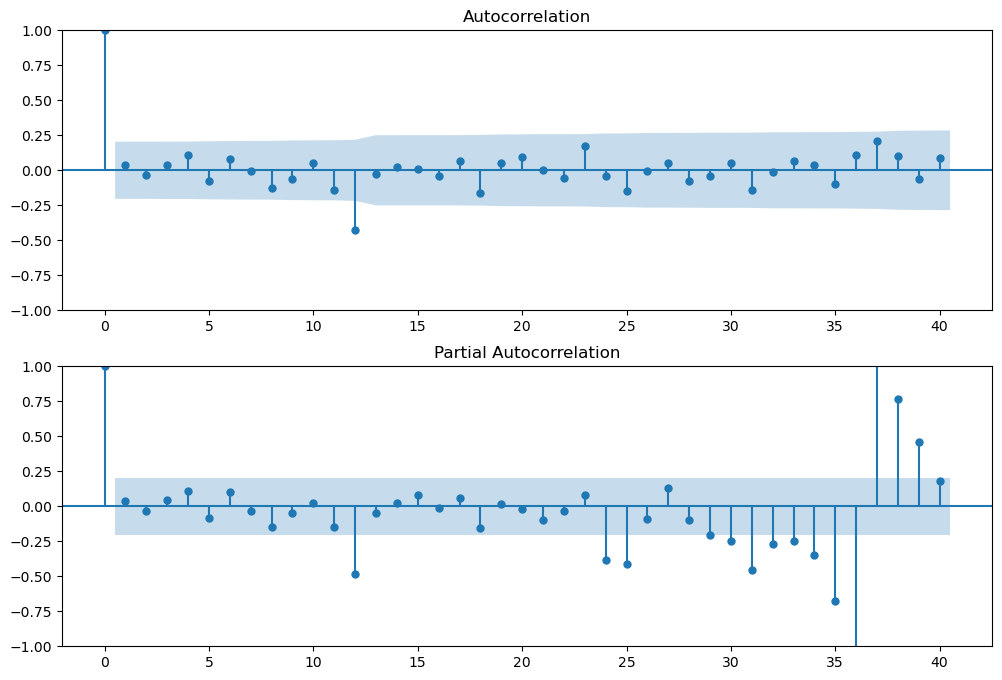

In [40]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [47]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

In [48]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming df['Sales'] is your time series data
# Specify the order of ARIMA model (p, d, q)
order = (1, 1, 1)

# Initialize ARIMA model
model = ARIMA(df['Sales'], order=order)

# Fit ARIMA model
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -969.234
Date:                Thu, 09 May 2024   AIC                           1944.467
Time:                        23:51:21   BIC                           1952.400
Sample:                    01-01-1964   HQIC                          1947.681
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0009      0.104     -0.009      0.993      -0.205       0.203
ma.L1         -0.9992      0.198     -5.042      0.000      -1.388      -0.611
sigma2      6.977e+06   2.86e-08   2.44e+14      0.0

C:\Users\HARSHITA KOTHARI\OneDrive\Desktop\anaconda jupyter\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HARSHITA KOTHARI\OneDrive\Desktop\anaconda jupyter\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HARSHITA KOTHARI\OneDrive\Desktop\anaconda jupyter\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [49]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -969.234
Date:                Thu, 09 May 2024   AIC                           1944.467
Time:                        23:51:25   BIC                           1952.400
Sample:                    01-01-1964   HQIC                          1947.681
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0009      0.104     -0.009      0.993      -0.205       0.203
ma.L1         -0.9992      0.198     -5.042      0.000      -1.388      -0.611
sigma2      6.977e+06   2.86e-08   2.44e+14      0.000    6.98e+06    6.98e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.50
Prob(Q):                              0.97   Prob(JB):                         0.11
Heteroskedasticity (H):               0.84   Skew:                            -0.22
Prob(H) (two-sided):                  0.62   Kurtosis:                         2.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.46e+29. Standard errors may be unstable.
"""

<Axes: xlabel='Month'>

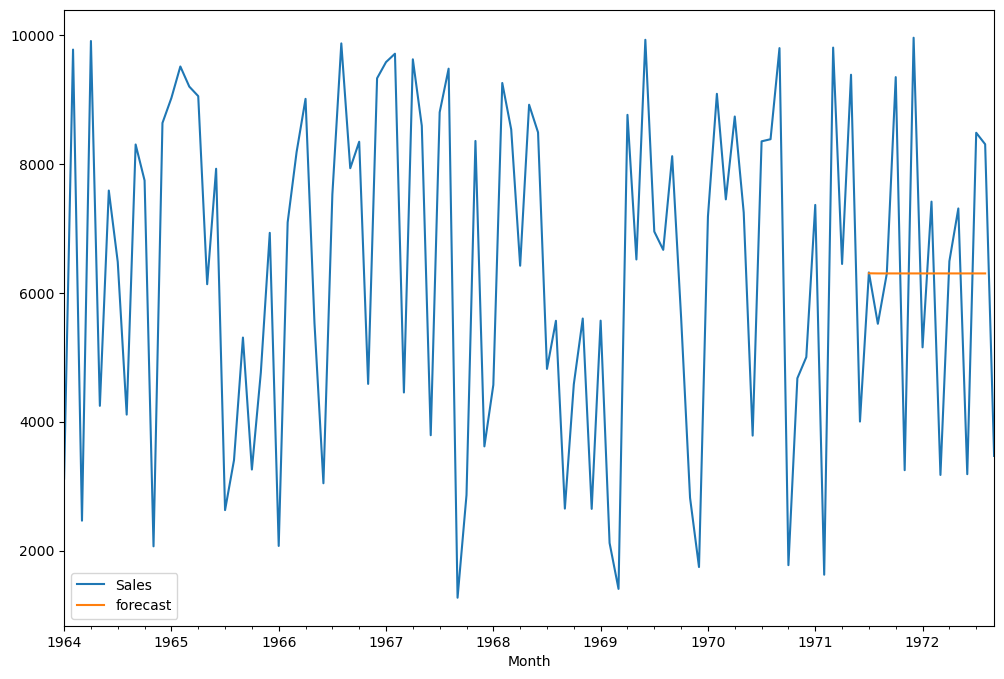

In [50]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [52]:
import statsmodels.api as sm

In [53]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\HARSHITA KOTHARI\OneDrive\Desktop\anaconda jupyter\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HARSHITA KOTHARI\OneDrive\Desktop\anaconda jupyter\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HARSHITA KOTHARI\OneDrive\Desktop\anaconda jupyter\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

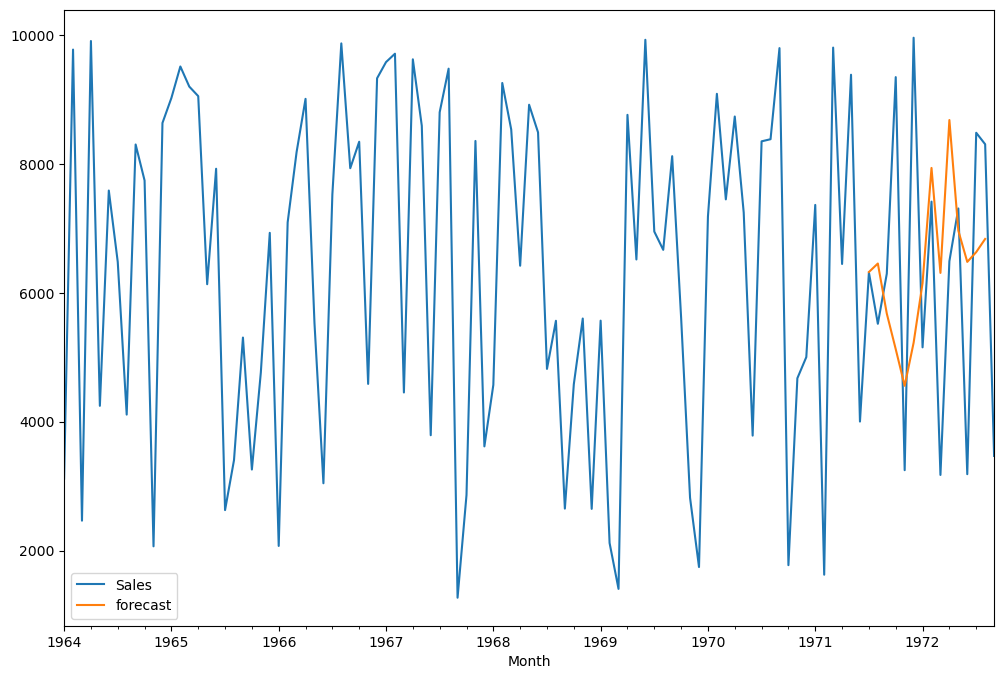

In [54]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [55]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [56]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [57]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [58]:
future_df=pd.concat([df,future_datest_df])

<Axes: >

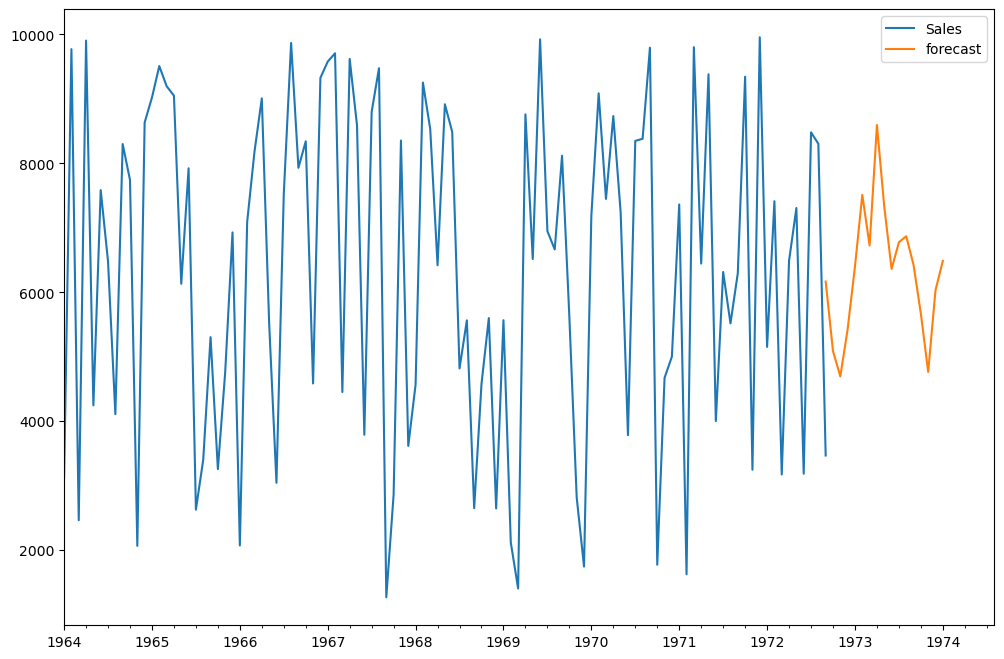

In [59]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 